In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import subprocess
import os
import argparse

In [12]:

def getPlot(Convdf, methodslist, x, y, title, plottype=None):

    # plotting types
    if plottype == "loglog":
        convrates = []
        for method in methodslist:
            Conv = np.polyfit(np.log(Convdf[method][x].to_numpy()), np.log(
                Convdf[method][y].to_numpy()), 1)
            convrates.append(Conv[0])

        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.loglog(Convdf[method][x].to_numpy(), Convdf[method][y].to_numpy(
            ), label=f'{method} Convergence Rate: {convrates[i]:.2f}', marker='o')

    elif plottype == "semilog":
        plt.figure(figsize=(10, 6))
        for i, method in enumerate(methodslist):
            plt.semilogx(Convdf[method][x].to_numpy(),
                         Convdf[method][y].to_numpy(), marker='o')

    else:
        plt.figure(figsize=(10, 6))
        for i, scheme in enumerate(schemes):
            plt.plot(Convdf[method][x].to_numpy(),
                     Convdf[method][y].to_numpy(), marker='o')

    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Ensure the Plots directory exists
    results_dir = "Plots"
    os.makedirs(results_dir, exist_ok=True)

    # Construct the filename and save the plot
    concattitle = ""
    for method in methodslist:
        concattitle += method + "_"

    file_title = f"{concattitle}{x}_vs_{y}.png".replace(" ", "_")
    plt.savefig(os.path.join(results_dir, file_title))


def create_multiindex_dataframe(result_dir, methodlist):
    # Initialize an empty list to hold each method's DataFrame
    dfs = []
    for method in methodlist:
        filename = f"{method}.csv"
        file_path = os.path.join(result_dir, filename)
        df = pd.read_csv(file_path)

        # Create a MultiIndex for columns using the method name and original headers
        multi_cols = [(method, col) for col in df.columns]
        df.columns = pd.MultiIndex.from_tuples(multi_cols)

        dfs.append(df)

    # Concatenate all DataFrames horizontally to create the multi-index structure
    combined_df = pd.concat(dfs, axis=1)
    return combined_df

In [13]:
current_dir = os.getcwd()
results_dir = os.path.join(current_dir, "Results")
methodlist = [os.path.splitext(filename)[0] for filename in os.listdir(results_dir)]
Convdf = create_multiindex_dataframe(results_dir, methodlist)

In [14]:
for method in methodlist:
    Convdf[method, 'TotalTime'] = Convdf[method]['MeshTime'] + Convdf[method]['SolveTime']
    Convdf[method, 'MeshTime/Elements'] = Convdf[method]['MeshTime']/Convdf[method]['Elements']
    Convdf[method, 'SolveTime/Elements'] = Convdf[method]['SolveTime']/Convdf[method]['Elements']
    Convdf[method, 'TotalTime/Elements'] = Convdf[method]['TotalTime']/Convdf[method]['Elements']

Convdf = Convdf.sort_index(axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/stefano/Desktop/VI-AMR/NumericalResults/ConvergenceResults/Plots/vces_metricIsoHess_vcesBR_TotalTime/Elements_vs_L2.png'

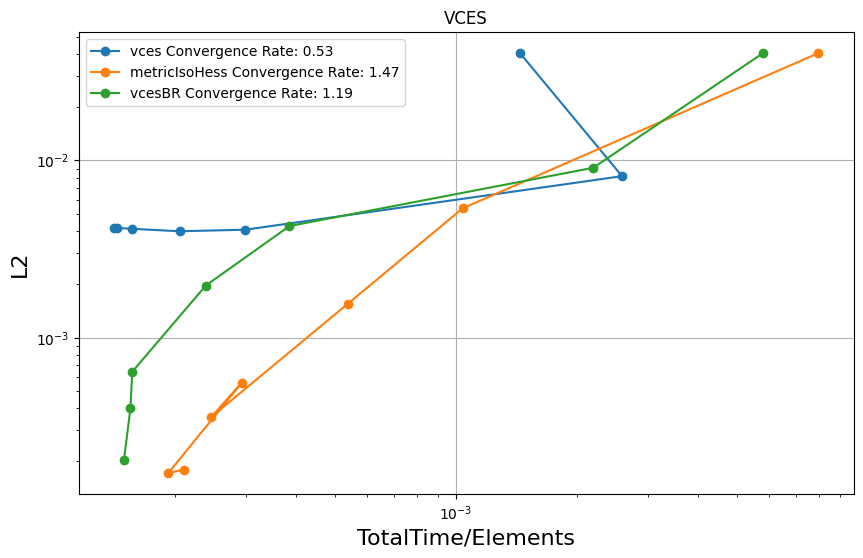

In [28]:
getPlot(Convdf, ['vces', 'metricIsoHess', 'vcesBR'], 'TotalTime/Elements','L2', 'VCES', plottype='loglog')

In [26]:
for method in methodlist:
    print(method)
    print(Convdf[method]['MeshTime/Elements'])

metricIso
0    0.006979
1    0.000782
2    0.000360
3    0.000248
4    0.000195
5    0.000146
6    0.000097
Name: MeshTime/Elements, dtype: float64
metricIsoHess
0    0.007344
1    0.000399
2    0.000356
3    0.000152
4    0.000181
5    0.000113
6    0.000090
Name: MeshTime/Elements, dtype: float64
vcesUnif
0    0.000232
1    0.000229
2    0.000084
3    0.000035
4    0.000078
5    0.000033
6    0.000084
Name: MeshTime/Elements, dtype: float64
uniform
0    0.000281
1    0.000084
2    0.000077
3    0.000084
4    0.000086
5    0.000087
6    0.000087
Name: MeshTime/Elements, dtype: float64
udoBR
0    0.004413
1    0.000258
2    0.000094
3    0.000114
4    0.000059
5    0.000052
6    0.000054
Name: MeshTime/Elements, dtype: float64
udoUnif
0    0.000249
1    0.000095
2    0.000083
3    0.000038
4    0.000079
5    0.000031
6    0.000087
Name: MeshTime/Elements, dtype: float64
udo
0    0.000504
1    0.000088
2    0.000058
3    0.000051
4    0.000070
5    0.000046
6    0.000045
Name: MeshTime/

In [27]:
methodlist

['metricIso',
 'metricIsoHess',
 'vcesUnif',
 'uniform',
 'udoBR',
 'udoUnif',
 'udo',
 'vcesBR',
 'vces']